In [230]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

---
## Setting up a connection

In [231]:
con = sqlite3.connect('../data/checking-logs.sqlite')

In [232]:
pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"', con)

,name
0,pageviews
1,checker
2,deadlines
3,datamart
4,test
5,control


In [233]:
pd.read_sql('SELECT * FROM checker LIMIT 10', con)

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1
3,3,ready,0,2020-04-16 21:46:48.121217,7,lab02,admin_1
4,4,checking,0,2020-04-16 21:53:01.862637,6,code_rvw,admin_1
5,5,ready,0,2020-04-16 21:53:05.373389,6,code_rvw,admin_1
6,6,checking,0,2020-04-17 05:18:51.965864,1,None,None
7,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
8,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
9,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4


---
## Getting dataset

In [234]:
query = """
SELECT
    uid,
    timestamp,
    numTrials
FROM
    checker
WHERE
    uid LIKE 'user_%'
    AND
    status='ready'
    AND
    labname='project1'
"""
df = pd.read_sql(query, con, parse_dates='timestamp')
# df['date'] = df.timestamp.dt.date
# df.drop(columns='timestamp', inplace=True)
# df = df.reindex(columns=['date', 'uid', 'numTrials'])

df

,uid,timestamp,numTrials
0,user_4,2020-04-17 05:19:02.744528,1
1,user_4,2020-04-17 05:22:45.549397,2
2,user_4,2020-04-17 05:34:24.422370,3
3,user_4,2020-04-17 05:43:27.773992,4
4,user_4,2020-04-17 05:46:32.275104,5
...,...,...,...
946,user_19,2020-05-15 10:22:39.698523,26
947,user_19,2020-05-15 10:22:46.248162,27
948,user_19,2020-05-15 10:23:18.043212,28
949,user_28,2020-05-15 10:38:14.430013,27


---
## Drawing a plot

- the `linewidth` should be ***3***
- the `background` of the graph is ***gray***
- the `height` should be ***10***, and the `width` should ***1.5x*** in relation to the height
- the `fontsize` of the title should be ***30***
- the `fontsize` of the axis labels is ***15***

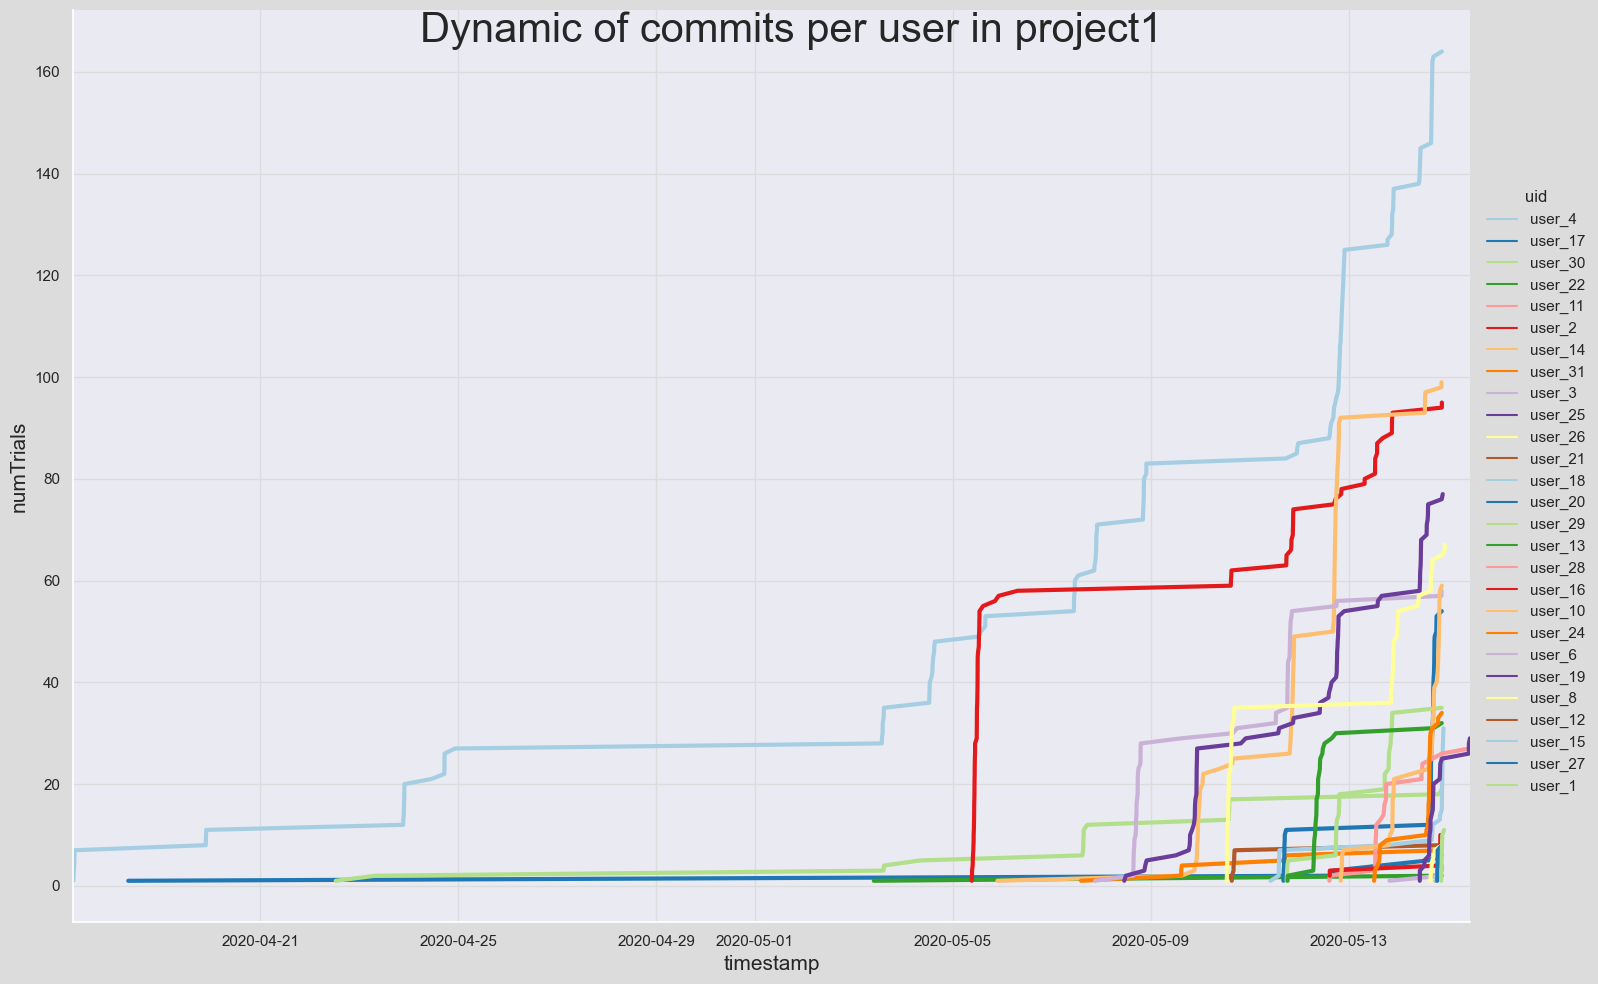

In [235]:
########################################################################
#### these plots give the same result but legend neends to be moved ####
########################################################################
# lp = sns.lineplot(data=df, x='timestamp', y='numTrials', hue="uid")  #
# sns.ecdfplot(data=df, x="timestamp",hue="uid", stat="count")         #
########################################################################

## to roll back to default values
# sns.set()

sns.set(rc={'axes.labelsize': 15,
            'figure.facecolor': 'gainsboro',
            'grid.color': 'gainsboro',}) # 'axes.facecolor':'lightgray', 'figure.facecolor':'gray'

rp = sns.relplot(data=df, x='timestamp', y='numTrials',
                 hue="uid", kind="line",
                 palette='Paired', linewidth=3,
                 height=10, aspect=1.5,)
rp.fig.suptitle('Dynamic of commits per user in project1', fontsize=30)
# rp.set_xlabels('timestamp', labelsize=15) # to change x labels params
# rp.set_ylabels('numTrials', labelsize=15) # to change y labels params

rp.set(xlim=(df.timestamp.min(), df.timestamp.max()))

plt.show()

---
## Closing the connection

In [236]:
con.close()

---
## Questions

1. Which `user` was the ***leader*** in the ***number of commits*** almost ***all of the time***?
> user_4
1. Which `user` was the ***leader*** for only a ***short period of time***?
> user_2